In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

### Початкові Дані

In [2]:

y = pd.Series(data=[21, 18, 15, 20, 27, 17, 19, 18, 25, 21, 16, 22, 27, 19, 18, 20, 24, 14, 16, 17, 23, 19, 19, 20, 24, 16, 18, 15, 26, 22, 17, 19], name='Y')
n = y.size
y_sum = sum(y)

t = pd.Series(data=[item for item in range(1, n+1)], name='T')

pd.DataFrame([t, y])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
T,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Y,21,18,15,20,27,17,19,18,25,21,...,19,20,24,16,18,15,26,22,17,19


### I. Середній рівень ряду динаміки
##### 1. Середній рівень моментного часового ряду з рівними проміжками часу між рівнями визначають за формулою: 
$$ \overline{y} = \frac{1}{n-1}*(\frac{y_1 + y_n}{2} + \sum_{i=1}^n y_i) $$

In [3]:
y_ = ((y[0] + y.iloc[-1])/2 + y_sum) / (n - 1) 

y_

21.032258064516128

✔️ Середній рівень інтервального ряду з рівними проміжками часу між рівнями визначається середнім арифметичним рівнів ряду динаміки (у подальшому дана формула буде згадана в "[_Аналітичному моделюванні тренду_](#vi-аналітичне-моделювання-тренда)"):
$$ \overline{y} = \frac{1}{n} \sum_{i=1}^n y_i $$

In [4]:
y_ = y_sum / n
y_sum / n

19.75

##### 2. Мінливість рівнів ряду відносно середнього рівня характеризується середньоквадратичним відхиленням:
$$ s = \sqrt{\frac{\sum_{i=1}^n (y_i - \overline{y})^2}{n-1}} $$

In [5]:
s = np.sqrt(sum([(y_i - y_)**2 for y_i in y]) / (n - 1))

s

3.5469205180396024

##### 3. Безрозмірний показник мінливості, який називається **коефіцієнтом варіації**:
$$ v = s/\overline{y} $$

In [6]:
v = s / y_

v

0.17959091230580265

### II. Показники порівняння рівнів часового ряду
$y_i$ — поточний рівень ряду; $y_{i-1}$ — рівень, що передує $y_i$; $y_0$ — базисний (початковий) рівень;
##### 1. Абсолютний приріст ланцюгового показника:
$$ \Delta_i = y_i - y_{i-1} $$

In [7]:
delta_chain = [y[i] - y[i-1] for i in range(1, n)]

print(*delta_chain, sep='; ')

-3; -3; 5; 7; -10; 2; -1; 7; -4; -5; 6; 5; -8; -1; 2; 4; -10; 2; 1; 6; -4; 0; 1; 4; -8; 2; -3; 11; -4; -5; 2


##### 2. Абсолютний приріст базисного показника:
$$ \Delta_i = y_i - y_0 $$

In [8]:
delta_basis = [y[i] - y[0] for i in range(1, n)]

print(*delta_basis, sep='; ')

-3; -6; -1; 6; -4; -2; -3; 4; 0; -5; 1; 6; -2; -3; -1; 3; -7; -5; -4; 2; -2; -2; -1; 3; -5; -3; -6; 5; 1; -4; -2


##### 3. Темп росту ланцюгового показника:
$$ k_i = y_i / y_{i-1} $$

In [9]:
k_chain = [y[i] / y[i-1] for i in range(1, n)]

print(*k_chain, sep=';\n')

0.8571428571428571;
0.8333333333333334;
1.3333333333333333;
1.35;
0.6296296296296297;
1.1176470588235294;
0.9473684210526315;
1.3888888888888888;
0.84;
0.7619047619047619;
1.375;
1.2272727272727273;
0.7037037037037037;
0.9473684210526315;
1.1111111111111112;
1.2;
0.5833333333333334;
1.1428571428571428;
1.0625;
1.3529411764705883;
0.8260869565217391;
1.0;
1.0526315789473684;
1.2;
0.6666666666666666;
1.125;
0.8333333333333334;
1.7333333333333334;
0.8461538461538461;
0.7727272727272727;
1.1176470588235294


##### 4. Темп росту базисного показника:
$$ k_{i0} = y_i / y_0 $$

In [10]:
k_basis = [y[i] / y[0] for i in range(1, n)]

print(*k_basis, sep=';\n')

0.8571428571428571;
0.7142857142857143;
0.9523809523809523;
1.2857142857142858;
0.8095238095238095;
0.9047619047619048;
0.8571428571428571;
1.1904761904761905;
1.0;
0.7619047619047619;
1.0476190476190477;
1.2857142857142858;
0.9047619047619048;
0.8571428571428571;
0.9523809523809523;
1.1428571428571428;
0.6666666666666666;
0.7619047619047619;
0.8095238095238095;
1.0952380952380953;
0.9047619047619048;
0.9047619047619048;
0.9523809523809523;
1.1428571428571428;
0.7619047619047619;
0.8571428571428571;
0.7142857142857143;
1.2380952380952381;
1.0476190476190477;
0.8095238095238095;
0.9047619047619048


##### 5. Темп приросту ланцюгового показника:
$$ T_i = \Delta i / y_{i-1} $$

In [11]:
T_chain = [delta_i_chain / y_prev for delta_i_chain, y_prev in zip(delta_chain, y)]

print(*T_chain, sep=';\n')

-0.14285714285714285;
-0.16666666666666666;
0.3333333333333333;
0.35;
-0.37037037037037035;
0.11764705882352941;
-0.05263157894736842;
0.3888888888888889;
-0.16;
-0.23809523809523808;
0.375;
0.22727272727272727;
-0.2962962962962963;
-0.05263157894736842;
0.1111111111111111;
0.2;
-0.4166666666666667;
0.14285714285714285;
0.0625;
0.35294117647058826;
-0.17391304347826086;
0.0;
0.05263157894736842;
0.2;
-0.3333333333333333;
0.125;
-0.16666666666666666;
0.7333333333333333;
-0.15384615384615385;
-0.22727272727272727;
0.11764705882352941


##### 6. Темп приросту базисного показника:
$$ T_{i0} = \Delta i_{i0} / y_0 $$

In [12]:
T_basis = [delta_i_basis / y0 for delta_i_basis, y0 in zip(delta_basis, y)]

print(*T_basis, sep=';\n')

-0.14285714285714285;
-0.3333333333333333;
-0.06666666666666667;
0.3;
-0.14814814814814814;
-0.11764705882352941;
-0.15789473684210525;
0.2222222222222222;
0.0;
-0.23809523809523808;
0.0625;
0.2727272727272727;
-0.07407407407407407;
-0.15789473684210525;
-0.05555555555555555;
0.15;
-0.2916666666666667;
-0.35714285714285715;
-0.25;
0.11764705882352941;
-0.08695652173913043;
-0.10526315789473684;
-0.05263157894736842;
0.15;
-0.20833333333333334;
-0.1875;
-0.3333333333333333;
0.3333333333333333;
0.038461538461538464;
-0.18181818181818182;
-0.11764705882352941


##### 7. Середній ланцюговий приріст розраховують за формулою:
$$ \Delta\overline{y} = \frac{1}{n-1} \sum_{i=2}^n \Delta i = \frac{y_n - y_1}{n-1} $$

In [13]:
# delta_chain_avg = np.average(delta_chain)
delta_chain_avg = (y.iloc[-1] - y[0])/(n-1)

delta_chain_avg

-0.06451612903225806

##### 8. Середній ланцюговий темп росту є середньогеометричною величиною коефіцієнтів росту:
$$ \overline{k} = \sqrt[n-1]{k_2 \cdot k_3 \dots k_n} = \sqrt[n-1]{y_n/y_1} $$

In [14]:
# k_chain_geom_avg = np.product(k_chain)**(1. / (n-1))
k_chain_geom_avg = (y.iloc[-1]/y[0])**(1. / (n-1))

k_chain_geom_avg

0.9967767073346545

##### 9. Знаючи середній ланцюговий темп росту, можна розрахувати (прогнозувати) j-й рівень ряду динаміки:
$$ y_i = y_0 \overline{k}^{j-1} $$

In [15]:
y_forecast = y[0] * k_chain_geom_avg**(n-1)

y_forecast

19.00000000000001

##### 10. Середній темп приросту визначається таким чином:
$$ \overline{T}= \overline{k}-1 $$

In [16]:
T_avg = k_chain_geom_avg - 1

T_avg

-0.0032232926653454896

### III. Автокореляція

#### Way #1

In [17]:
# autocorrelation coefficients with L: 0..5
auto_corr = sm.tsa.acf(y, nlags=5)  

for i in range(len(auto_corr)):
    print(f'L: {i}\tauto correlation: {auto_corr[i]}')

L: 0	auto correlation: 1.0
L: 1	auto correlation: -0.09246794871794867
L: 2	auto correlation: -0.41762820512820503
L: 3	auto correlation: -0.14919871794871783
L: 4	auto correlation: 0.5108974358974357
L: 5	auto correlation: -0.03669871794871794


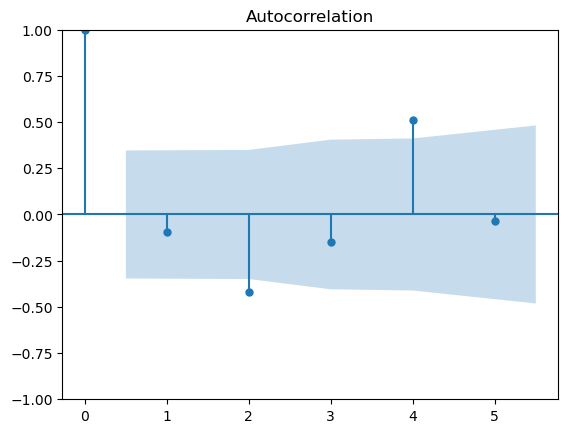

In [18]:
# plot autocorrelation function
tsaplots.plot_acf(y, lags=5)
plt.show()

#### Way #2

##### 1. Взаємозв’язок рівнів ряду динаміки з відповідними рівнями того ж ряду називають автокореляцією.
Вивчаємо взаємозалежність рівнів у парах ($y_i;y_{i+L}$), $i=1,2, \dots, n-L$, тобто взаємозв'язок рівнів ряду динаміки з рівнями того ж ряду динаміки, які
зміщені на L одиниць часу. Величина L називається лагом, вона може набувати значень 1, 2, ..., k. Звичайно $k < \frac{n}{4}$.

Мірою автокореляції служить коефіцієнт автокореляції.
Обчислюють коефіцієнт автокореляції за формулою:

$$ r(L) = \frac{\overline{y_t \cdot y_{t+L}} - \overline{y_t} \cdot \overline{y_{t+L}}}{\sqrt{(\overline{y_t^2} - \overline{y_t}^2)(\overline{y_{t+L}^2} + (\overline{y_{t+L}})^2)}} $$
де
$$ \overline{y_t \cdot y_{t+L}} = \frac{\sum_{i=1}^{n-L}y_i y_{i+L}}{n-L}; \hspace{2mm} \overline{y_t^2} = \frac{\sum_{i=1}^{n-L}y_i^2}{n-L}; \hspace{2mm} \overline{y_{t+L}^2} = \frac{\sum_{i=1}^{n-L}y_{i+L}^2}{n-L} $$

In [19]:
# compute ACF (autocorrelation coefficient) with L, where L = 1..5
# r_L = np.zeros(5)
# for L in range(1, 6):
#     for i in range(n-L):
#         # break complicated formula into pieces (with sum)
#         a = b = c = d = e = 0
#         a += y[i]*y[i+L]
#         b += y[i]
#         c += y[i+L]
#         d += y[i]**2
#         e += y[i+L]**2
#     a/=n-L
#     b/=n-L
#     c/=n-L
#     d/=n-L
#     e/=n-L

#     r_L[L-1] = (a - b * c) / np.sqrt((d - b**2) * (e + c**2))

# for i in range(len(r_L)):
#     print(f'L: {i}\tacf: {r_L[i-1]}')

##### 2. Критичне значення коефіцієнта автокореляції виписуємо з табл. 1 додатка:
$$ r^{*} = r(\alpha = 0.05; n) $$

In [20]:
r_crit = 0.3494

for i in range(len(auto_corr)):
    print(f'{auto_corr[i]:.3f}' + (f' < {r_crit} => автокореляція рівнів часового ряду з лагом {i} є незначною.' if auto_corr[i] < r_crit 
    else f' > {r_crit} => автокореляція рівнів часового ряду з лагом {i} є істотною.'))

1.000 > 0.3494 => автокореляція рівнів часового ряду з лагом 0 є істотною.
-0.092 < 0.3494 => автокореляція рівнів часового ряду з лагом 1 є незначною.
-0.418 < 0.3494 => автокореляція рівнів часового ряду з лагом 2 є незначною.
-0.149 < 0.3494 => автокореляція рівнів часового ряду з лагом 3 є незначною.
0.511 > 0.3494 => автокореляція рівнів часового ряду з лагом 4 є істотною.
-0.037 < 0.3494 => автокореляція рівнів часового ряду з лагом 5 є незначною.


Якщо $r(L) < r^{*}$, то автокореляція рівнів часового ряду з лагом є незначною.   
Якщо $r(L) > r^{*}$, то автокореляція рівнів часового ряду з лагом є істотною.

##### 3. Графічне зображення сукупності коефіцієнтів автокореляції точками $(L;r_L)$ на площині, з'єднаних відрізками прямих у вигляді многокутника, називають _корелограмою_.

### IV. Вирівнювання часового ряду шляхом усереднення

##### 1. Формула вирівнювання часового ряду способом усереднення за трьома рівнями (m = 3) така:
$$ \tilde{y}_i = \frac{1}{3}(y_{i-1} + y_i + y_{i+1}); i = 2,3 \dots, n-1 $$
Усереднені за (10.23) рівні доповнюються початковим і кінцевим вирівняними рівнями, які визначаються за такими формулами:
$$ y_1 = \frac{1}{6}(5y_1 + y_2 - y_3) $$
$$ y_n  = \frac{1}{6}(-y_{n-2} + 2y_{n-1} - 5y_n) $$

##### 2. Формула вирівнювання часового ряду способом усереднення за п'ятьма рівнями (m = 5) має такий вигляд:
$$ \tilde{y}_1 = \frac{1}{5}(y_{i-2} + y_{i-1} + y_i + y_{i+1} - y_{i+2}), i = 3,4 \dots, n-2 $$

###### Лінія, що з’єднує усереднені точки, є емпіричною лінією тренда.

In [21]:
# Moving average by 3 levels
moving_avg3 = y.rolling(window=3).mean().iloc[3:]

for item in moving_avg3:
    print(f'{item:.2f};', end='\t')

17.67;	20.67;	21.33;	21.00;	18.00;	20.67;	21.33;	20.67;	19.67;	21.67;	22.67;	21.33;	19.00;	20.67;	19.33;	18.00;	15.67;	18.67;	19.67;	20.33;	19.33;	21.00;	20.00;	19.33;	16.33;	19.67;	21.00;	21.67;	19.33;	

In [22]:
# Moving average by 5 levels
moving_avg5 = y.rolling(window=5).mean().iloc[5:]

for item in moving_avg5:
    print(f'{item:.2f};', end='\t')

19.40;	19.60;	20.20;	21.20;	20.00;	19.80;	20.40;	22.20;	21.00;	20.40;	21.20;	21.60;	19.00;	18.40;	18.20;	18.80;	17.80;	18.80;	19.60;	21.00;	19.60;	19.40;	18.60;	19.80;	19.40;	19.60;	19.80;	

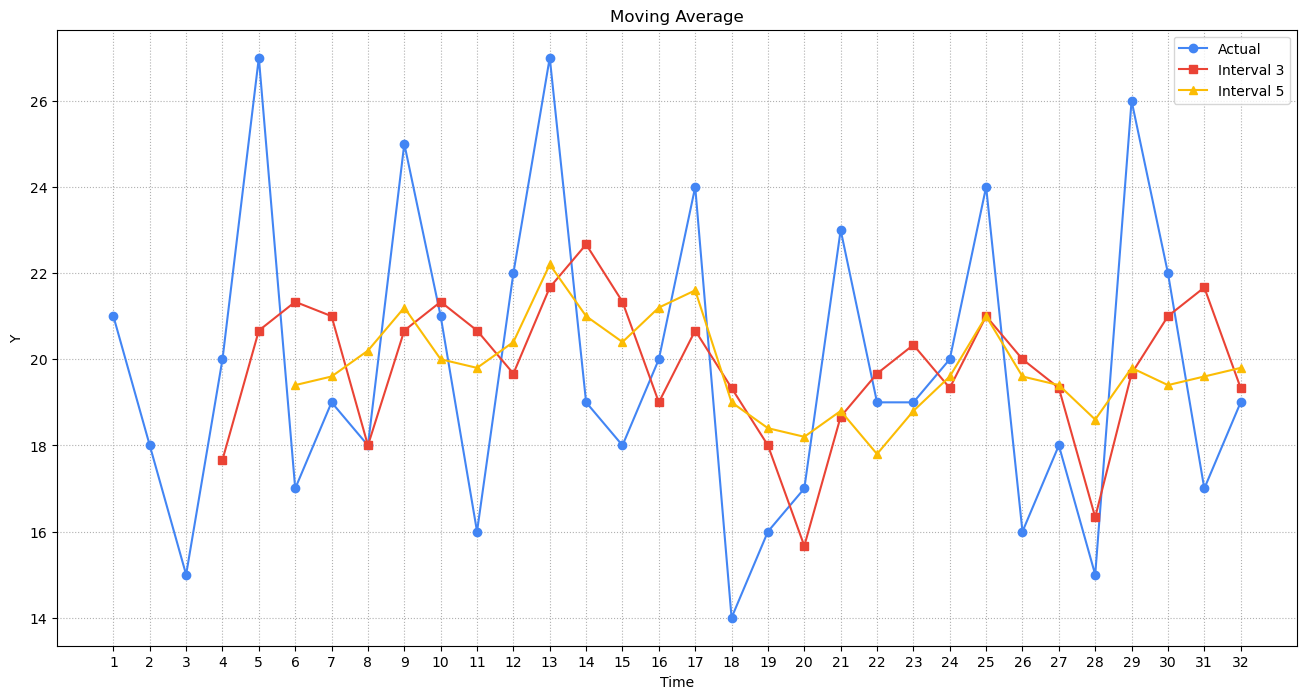

In [23]:
# plot moving average 
plt.figure(figsize=(16,8))
plt.title('Moving Average')
plt.plot(t, y, marker='o', label='Actual', color='#4285f4')
plt.plot(t[3:], moving_avg3, marker='s', label='Interval 3', color='#ea4335')
plt.plot(t[5:], moving_avg5, marker='^', label='Interval 5', color='#fbbc04')

plt.xlabel('Time')
plt.xticks(t)
plt.ylabel('Y')
plt.grid(linestyle=':')
plt.legend()
plt.show()

### V. Експонентне вирівнювання

##### 1. Формула для розрахунку експонентно вирівняних значень має такий вигляд:
$$ \tilde{y}_i = \alpha y_i + (1 - \alpha) \tilde{y}_{i-1}, i = 1,2,3,\dots,n $$
Величину $\alpha$ називають параметром згладжування. Значення $\alpha$ вибирають у діапазоні від 0,1 до 0,3.  
Най $\alpha$ буде **0.2**. Тоді  $(1 - \alpha)$ = 0.8    
Початковий вирівняний рівень або визначають за формулами усереднення з інтервалом 5 чи 3, або ✔️ просто прирівнюють до першого рівня ряду динаміки.

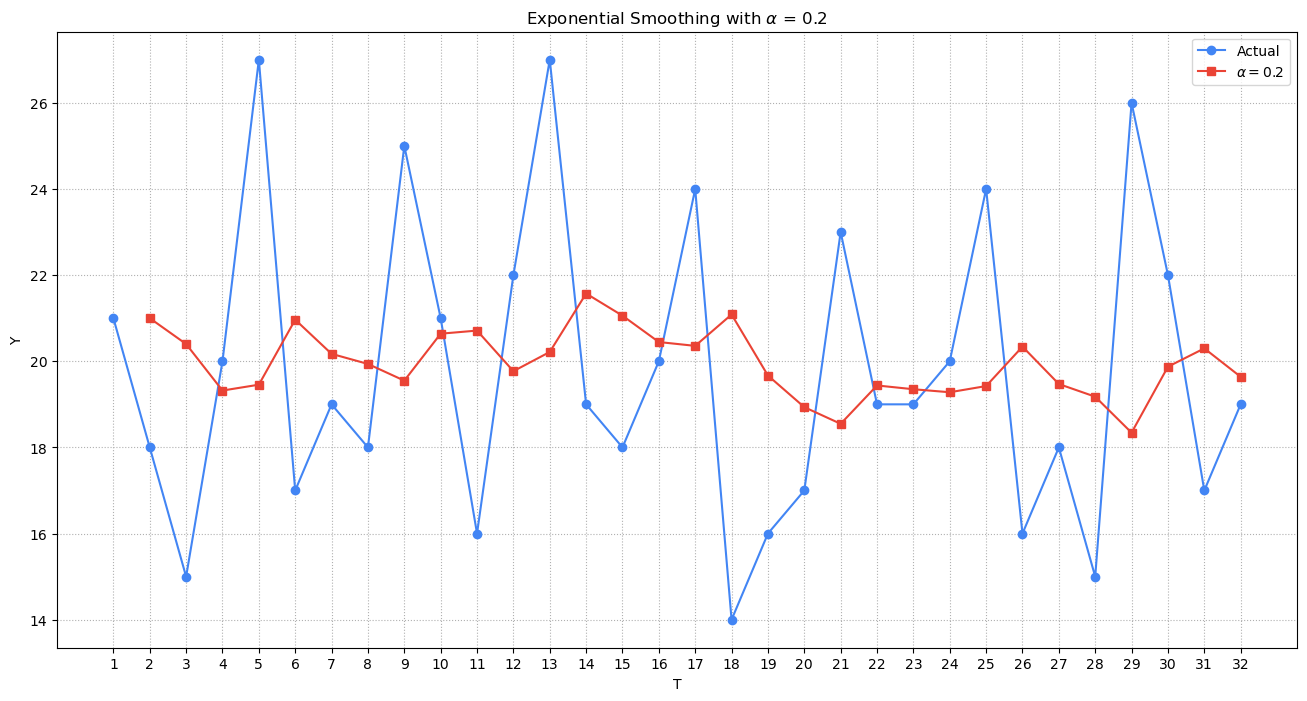

In [24]:
# Exponential Smoothing
alpha = 0.2 
exp_smooth = [y[0]]
for i in range(1,n-1):
    exp_smooth.append(alpha*y[i] + (1-alpha)*exp_smooth[i-1])


plt.figure(figsize=(16,8))
plt.title(f'Exponential Smoothing with $\\alpha$ = {alpha}')
plt.plot(t, y, marker='o', label='Actual', color='#4285f4')     # plot ordinal values of Y
plt.plot(t[1:], exp_smooth, marker='s', label='$\\alpha = 0.2$', color='#ea4335')        # exponential smoothing values
plt.xlabel('T')
plt.ylabel('Y')
plt.xticks(t)
plt.grid(linestyle=':')
plt.legend()
plt.show()

##### 2. Згладжування рівнів ряду динаміки за експонентним вирівнюванням дає можливість короткострокового прогнозування. Для прогнозованого згладженого рівня $\tilde{y}_{n+1}$ записуємо таке рівняння:
$$ \tilde{y}_{n+1} = \tilde{y}_n + \Delta \tilde{y}, $$
де $\Delta \tilde{y}$ - похибка прогнозу. Похибка прогнозу оцінюється за такою формулою: $ \Delta \tilde{y} = \pm t^* s \sqrt{\frac{\alpha}{2 - \alpha}}$, де $t^*$ — коефіцієнт Стьюдента; s — [середньоквадратичне відхилення](#2-мінливість-рівнів-ряду-відносно-середнього-рівня-характеризується-середньоквадратичним-відхиленням); $\alpha$ — параметр згладжування.   

Вірогідний проміжок для прогнозованого рівня ширший і визначається таким виразом:
$$ \tilde{y}_{n+1} = \tilde{y}_n \pm t^* s \sqrt{\frac{\alpha}{2 - \alpha}} $$

### VI. Аналітичне моделювання тренду

##### 1. Запишемо рівняння регресії
$$\hat{y}(t) = b_0 + b_1 t$$      
де 
$$b_1 = \frac{\overline{yt} - \overline{y}\cdot\overline{t}}{\overline{t^2} - \overline{t}^2}; \hspace{3mm} \
b_0 = \overline{y} - b_1 \overline{t}$$        
Оскільки рівні ряду визначені для часової послідовності $\{t\} = \{1,2, \dots, n\}$, то можна використати такі формули:     
$$\sum_{i=1}^n t_i = \frac{n(n+1)}{2}; \hspace{3mm} \overline{t} = \frac{n+1}{2};$$
$$\sum_{i=1}^n t_i^2 = \frac{n(n+1)(2n+1)}{6}; \hspace{3mm} \overline{t^2} = \frac{(n+1)(2n+1)}{6}$$
та $$\overline{yt} = \frac{1}{n}\sum_{i=1}^n y_i \sum_{j=1}^n t_j;$$
$$\overline{y} = \frac{1}{n}\sum_{i=1}^n y_i$$

In [25]:
# t_ = np.average(t)
t_ = (n+1)/2
t_sqr_ = ((n + 1) * (2*n + 1)) / 6
yt_ = y_ * (n * (n + 1) / 2)

# b1 = (yt_ - y_ * t_) / (t_sqr_ - t_**2)
b1 = sum([(t[i] - t_)*(y[i] - y_) for i in range(n)]) / sum([(t[i] - t_)**2 for i in range(n)])
b0 = y_ - b1 * t_
# least sum of squares
predicted_y = [b0 + b1*t[i] for i in range(n)]

print(f'b1: {b1}')
print(f'b0: {b0}')
print(f't_: {t_}')

b1: -0.020894428152492667
b0: 20.094758064516128
t_: 16.5


##### 2. Істотність лінійної тенденції ряду динаміки визначається дисперсійним аналізом. Складемо таблицю дисперсійного аналізу:     
|  Джерело мінливості  |                 Сума квадратів                 | Число ступенів |      Середній квадрат     |        f-відношення       |
|:--------------------:|:----------------------------------------------:|:--------------:|:-------------------------:|:-------------------------:|
|   Лінійна регресія   |         $SS = b_1^2n(\frac{n^2-1}{12})$        |    $v_x = 1$   |       $MS_x = SS_x$       |          &#8212;          |
| Залишкове відхилення | $SS_e = \sum_{i=1}^n(y_i - \hat{y_i})^2$       |   $v_e = n-2$  | $MS_e = \frac{SS_e}{n-2}$ | $f_e = \frac{MS_x}{MS_e}$ |
|         Сума         |   $SS_T = n(\overline{y^2} - \overline{y}^2)$  |    $v_T = n-1$ |          &#8212;          |          &#8212;          |

In [26]:
anova_table = pd.DataFrame(index=['Regression', 'Residual', 'Total'],
columns=['SS', 'df', 'MS', 'F'])
anova_table.index.name = 'Джерело мінливості'

# SS (sum of squares)
anova_table.iloc[0][0] = b1**2 * n * ((n**2 - 1) / 12)

# SS_e
anova_table.iloc[1][0] = sum([(y[i] - predicted_y[i])**2 for i in range(n)])

# SS_T
y_sqr_ = sum([y[i]**2 for i in range(n)])
# anova_table.iloc[2][0] = (y_sqr_ - y_**2) / n
anova_table.iloc[2][0] = anova_table.iloc[0][0] + anova_table.iloc[1][0]

# v_x, v_e, v_T
anova_table.iloc[0][1] = 1
anova_table.iloc[1][1] = n - 2
anova_table.iloc[2][1] = n - 1

# MS_x, MS_e
anova_table.iloc[0][2] = anova_table['SS'][0]
anova_table['MS'][1] = anova_table['SS'][1] / (n-2)

# f_e
anova_table.iloc[0][-1] = anova_table['MS'][0] / anova_table['MS'][1]

anova_table

,SS,df,MS,F
Джерело мінливості,,,,
Regression,1.190982,1,1.190982,0.091895
Residual,388.809018,30,12.960301,NaN
Total,390.0,31,NaN,NaN


Критична точка визначається з таблиць F-розподілу: $f^* = f(p = 1 - \alpha; v_1 = 1; v_2 = n - 2)$      
Якщо емпіричне значення критерію $f_e$ більше від критичного, то є підстави стверджувати про наявність лінійної тенденції у ряді динаміки.        
$f^*$ = 4.17

In [27]:
print(f'f_e > f^*: {anova_table.iloc[0][-1] > 4.17}')

f_e > f^*: False


##### 4. Оцінки дисперсій параметрів лінійного тренда розраховують за такими формулами:
$$S_{b_1}^2 = \frac{12}{n(n^2 - 2)}S^2; \hspace{2mm} S^2 = MS_e$$
$$S_{b_0}^2 = \overline{t^2}S_{b_1}^2$$

In [28]:
S_b1_sqr = 12 / (n*(n**2 - 2)) * anova_table['MS'][1]**2
S_b0_sqr = t_sqr_ * S_b1_sqr

print(f'S_b1_sqr: {S_b1_sqr}')
print(f'S_b0_sqr: {S_b0_sqr}')

S_b1_sqr: 0.061632604437144696
S_b0_sqr: 22.03365608627923


##### 5. Вірогідні проміжки для параметрів лінійного тренду 
$$Pr \lbrace \beta_0 \in \lbrack (b_0 - t_2^* S_{b_0}^2); (b_0 + t_2^* S_{b_0}^2) \rbrack \rbrace,$$
$$Pr \lbrace \beta_1 \in \lbrack (b_1 - t_2^* S_{b_1}^2); (b_1 + t_2^* S_{b_1}^2) \rbrack \rbrace,$$
$t_2^* = t(p = 1 - \frac{\alpha}{2}; v = n-2)$     
$t_2^* = 2.04227$

In [29]:
t_criteria2 = 2.04227
print('Pr{' + f'β0 ∈ [({b0 - t_criteria2*S_b0_sqr}); ({b0 + t_criteria2*S_b0_sqr})]' + '}')
print('Pr{' + f'β1 ∈ [({b1 - t_criteria2*S_b1_sqr}); ({b1 + t_criteria2*S_b1_sqr})]' + '}')

Pr{β0 ∈ [(-24.90391675080935); (65.0934328798416)]}
Pr{β1 ∈ [(-0.14676484721634017); (0.10497599091135483)]}


##### 6. Для окремого прогнозованого рівня ряду динаміки при $t = t_0$ з вірогідністю $(1-\alpha)$ вірогідний проміжок є:
$$[(\hat{y}(t_0) - t_2^* s \sqrt{1 + 1/n + \frac{(t_0 - \overline{t})^2}{n(\overline{t^2} - \overline{t}^2)}}); \hspace{2mm}
(\hat{y}(t_0) + t_2^* s \sqrt{1 + 1/n + \frac{(t_0 - \overline{t})^2}{n(\overline{t^2} - \overline{t}^2)}})]$$

In [30]:
print(f'[({predicted_y[0] - t_criteria2 * s * np.sqrt(1 + 1./n + (t[0] - t_)**2 / (n*(t_sqr_ - t_**1)))}); ' +
f'({predicted_y[0] + t_criteria2 * s * np.sqrt(1 + 1./n + (t[0] - t_)**2 / (n*(t_sqr_ - t_**2)))})]')

[(12.639670108489376); (27.73761477356193)]


### VII. Автокореляція відхилень від тренда

##### Залишкові відхилення від тренда: 

In [31]:
# Residual = Observed Value - Predicted Value
residual = [y[i] - predicted_y[i] for i in range(n)]

print(*residual, sep=';\t')

0.9261363636363633;	-2.0529692082111417;	-5.03207478005865;	-0.011180351906158847;	7.009714076246336;	-2.9693914956011724;	-0.948497067448681;	-1.927602639296186;	5.093291788856305;	1.1141862170087968;	-3.864919354838708;	2.1559750733137832;	7.176869501466278;	-0.8022360703812303;	-1.781341642228739;	0.23955278592375606;	4.2604472140762475;	-5.718658357771261;	-3.697763929618766;	-2.6768695014662747;	3.3440249266862168;	-0.6350806451612883;	-0.6141862170087968;	0.4067082111436946;	4.42760263929619;	-3.551502932551319;	-1.5306085043988276;	-4.509714076246333;	6.511180351906159;	2.5320747800586503;	-2.4470307917888547;	-0.4261363636363633


$H_0$ рівні часового ряду ([залишкового відхилення](#залишкові-відхилення-від-тренда)) незалежні;   
$H_1$ має місце автокореляція рівнів часового ряду ([залишкового відхилення](#залишкові-відхилення-від-тренда)) $\alpha$ - рівень значущості.   

Для перевірки гіпотез використовують критерій Дарбіна—Ватсона:  
$$D = \frac{\sum_{i=2}^n(E_i - E_{i-1})^2}{\sum_{i=1}^n E_i^2}$$

In [32]:
D = sum([(residual[i] - residual[i-1])**2 for i in range(1, n)]) / sum([residual[i]**2 for i in range(n)])

D

2.1859831375181793

Можливі чотири варіанти висновку перевірки гіпотез: 
1. $D < d_1 \Rightarrow$ ряд має додатну автокореляцію;
2. $D > 4-d_1 \Rightarrow$ ряд має від’ємну автокореляцію;
3. $d_2 < D < 4 - d_2 \Rightarrow$ автокореляція відсутня;
4. $d_1 < D < d_2$ або $4-d_2 < D < 4-d_1\Rightarrow$ однозначного висновку немає, необхідні додаткові дослідження.

За таблицею критеріїв Дарбіна-Ватсона: $d_1 = 1.28$, $d_2 = 1.57$

In [33]:
d1, d2 = 1.28, 1.57
if D < d1:
    print('ряд має додатну автокореляцію')
elif D > 4 - d1:
    print('ряд має від’ємну автокореляцію;')
elif d2 < D < 4 - d2:
    print('автокореляція відсутня')
elif d1 < D < d2 or 4 - d2 < D < d - d1:
    print('однозначного висновку немає, необхідні додаткові дослідження.')

автокореляція відсутня
